In [7]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 24 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [8]:
!pip install h2o

In [9]:
import h2o

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 mins 44 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,6 hours and 55 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_sxz25s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [11]:
from h2o.automl import H2OAutoML

In [12]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [13]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [14]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
churn_train , churn_test , churn_vaild = churn_df.split_frame(ratios=[.7 , .15])

In [18]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.2,528.35,Yes
4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.8,202.25,No


In [19]:
y = 'Churn'
x = churn_df.columns
x.remove(y)
x.remove('customerID')

In [20]:
aml = H2OAutoML(max_models= 10 , seed = 10 , exclude_algos=['StackedEnsemble' , "DeepLearning"] , verbosity="info" , nfolds=0)

In [21]:
aml.train(x = x , y=y , training_frame= churn_train , validation_frame= churn_vaild)

AutoML progress: |
23:40:19.609: Project: AutoML_1_20231220_234019
23:40:19.610: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:40:19.610: Setting stopping tolerance adaptively based on the training frame: 0.014265349750363764
23:40:19.611: Build control seed: 10
23:40:19.611: training frame: Frame key: AutoML_1_20231220_234019_training_py_2_sid_a0a4    cols: 21    rows: 4914  chunks: 8    size: 265769  checksum: -1370570220710291264
23:40:19.612: validation frame: Frame key: py_4_sid_a0a4    cols: 21    rows: 1064  chunks: 8    size: 139230  checksum: -2782245976419389284
23:40:19.612: leaderboard frame: Frame key: py_4_sid_a0a4    cols: 21    rows: 1064  chunks: 8    size: 139230  checksum: -2782245976419389284
23:40:19.612: blending frame: NULL
23:40:19.612: response column: Churn
23:40:19.612: fold column: null
23:40:19.613: weights column: null
23:40:19.635: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 9

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231220_234019


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          17021                  6            12           8.775         27            31            29.1

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11728600667953577
RMSE: 0.34247044643229546
LogLoss: 0.3665378383116724
Mean Per-Class Error: 0.19988655229662422
AUC: 0.8876036567195947
AUCPR: 0.7389886085021854
Gini: 0.7752073134391895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3266655329325603
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3006  608    0.1682   (608.0/3614.0)
Yes    301   999    0.2315   (301.0/1300.0)
Total  3307  1607   0.185    (909.0/4914.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.326666     0.687307  214
max f2                       0.206313     0.784235  269
max f0point5                 0.527383     0.690559  135
max accuracy                 0.483696     0.831298  153
max precision                0.915468     1         0
max recall                   0.0238638    1         385
max specificity              0.915468     1         0
max absolute_mcc             0.366191     0.565865  199
max min_per_class_accuracy   0.294021     0.803846  229
max mean_per_class_accuracy  0.256695     0.807726  246
max tns                      0.915468     3614      0
max fns                      0.915468     1297      0
max fps                      0.0105302    3614      399
max tps                      0.0238638    1300      385
max tnr                      0.915468     1         0
max fnr                      0.915468     0.997692  0
max fpr                      0.0105302    1         399
max tpr                      0.0238638    1         385

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010582                    0.880459           3.63462    3.63462            0.961538         0.893839   0.961538                    0.893839            0.0384615       0.0384615                  263.462   263.462            0.0379081
2        0.0201465                   0.85467            3.53872    3.58909            0.93617          0.868875   0.949495                    0.881988            0.0338462       0.0723077                  253.872   258.909            0.0709242
3        0.030118                    0.834102           3.31714    3.49905            0.877551         0.842621   0.925676                    0.868954            0.0330769       0.105385                   231.714   249.905            0.102341
4        0.0400895                   0.808693           3.31714    3.45381            0.877551         0.822028   0.913706                    0.857282            0.0330769       0.138462                   231.714   245.381            0.133758
5        0.0500611                   0.788078           3.31714    3.42659            0.877551         0.798613   0.906504                

In [22]:
lb = aml.leaderboard

In [23]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20231220_234019,0.832286,0.433982,0.636722,0.241171,0.377679,0.142641
GLM_1_AutoML_1_20231220_234019,0.831374,0.434442,0.629592,0.249411,0.377516,0.142518
GBM_2_AutoML_1_20231220_234019,0.826262,0.442704,0.635622,0.258923,0.380772,0.144988
GBM_3_AutoML_1_20231220_234019,0.825253,0.44954,0.628221,0.256788,0.383932,0.147404
XRT_1_AutoML_1_20231220_234019,0.822084,0.442556,0.626805,0.253916,0.381801,0.145772
XGBoost_3_AutoML_1_20231220_234019,0.821737,0.450885,0.634057,0.271463,0.384746,0.14803
GBM_4_AutoML_1_20231220_234019,0.820351,0.457621,0.622095,0.260806,0.387242,0.149956
XGBoost_2_AutoML_1_20231220_234019,0.81956,0.468055,0.601497,0.257777,0.391144,0.152993
XGBoost_1_AutoML_1_20231220_234019,0.819091,0.45677,0.61872,0.26429,0.386061,0.149043
DRF_1_AutoML_1_20231220_234019,0.811905,0.463286,0.605244,0.268073,0.38885,0.151205


In [24]:
churn_pred = aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [25]:
churn_pred.head()

predict,No,Yes
No,0.972536,0.0274636
Yes,0.611516,0.388484
Yes,0.758333,0.241667
Yes,0.548353,0.451647
Yes,0.266164,0.733836
No,0.85945,0.14055
Yes,0.54703,0.45297
No,0.982147,0.0178534
No,0.811288,0.188712
No,0.834734,0.165266


In [26]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14057191950871264
RMSE: 0.3749292193317462
LogLoss: 0.4277231638012083
Mean Per-Class Error: 0.24195674030596998
AUC: 0.8382947021367173
AUCPR: 0.6358716747058188
Gini: 0.6765894042734346

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2877819817268676
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     629   154    0.1967   (154.0/783.0)
Yes    81    201    0.2872   (81.0/282.0)
Total  710   355    0.2207   (235.0/1065.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.287782     0.631083  210
max f2                       0.106289     0.753899  306
max f0point5                 0.388478     0.603318  163
max accuracy                 0.432265     0.791549  146
max precision                0.913794     1         0
max recall                   0.0235405    1         382
max specificity              0.913794     1         0
max absolute_mcc             0.287782     0.483042  210
max min_per_class_accuracy   0.248303     0.758865  227
max mean_per_class_accuracy  0.208361     0.764762  248
max tns                      0.913794     783       0
max fns                      0.913794     281       0
max fps                      0.0115516    783       399
max tps                      0.0235405    282       382
max tnr                      0.913794     1         0
max fnr                      0.913794     0.996454  0
max fpr                      0.0115516    1         399
max tpr                      0.0235405    1         382

Gains/Lift Table: Avg response rate: 26.48 %, avg score: 24.14 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103286                   0.86178            3.08994   3.08994            0.818182         0.88645    0.818182                    0.88645             0.0319149       0.0319149                  208.994   208.994            0.0293606
2        0.0206573                   0.831695           3.7766    3.43327            1                0.841257   0.909091                    0.863853            0.0390071       0.070922                   277.66    243.327            0.0683677
3        0.0300469                   0.80637            3.7766    3.54056            1                0.819538   0.9375                      0.850005            0.035461        0.106383                   277.66    254.056            0.103829
4        0.0403756                   0.768297           2.05996   3.1618             0.545455         0.790061   0.837209                    0.83467             0.0212766       0.12766                    105.996   216.18             0.11872
5        0.0507042                   0.738254           3.08994   3.14716            0.818182         0.75079    0.833333                    0.817584            0.0319149       0.159574                   208.994   214.716            0.14808
6        0.100469                    0.632126           2.35147   2.75303            0.622642         0.687239   0.728972                    0.75302             0.117021        0.276596                   135.147   175.303            0.239559
7        0.150235                    0.550677           1.99518   2.50199            0.528302         0.592066   0.6625                      0.699704            0.0992908       0.375887                   99.5183   150.199            0.306921
8        0.2                

In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [29]:
model_ids

['GBM_1_AutoML_1_20231220_234019',
 'GLM_1_AutoML_1_20231220_234019',
 'GBM_2_AutoML_1_20231220_234019',
 'GBM_3_AutoML_1_20231220_234019',
 'XRT_1_AutoML_1_20231220_234019',
 'XGBoost_3_AutoML_1_20231220_234019',
 'GBM_4_AutoML_1_20231220_234019',
 'XGBoost_2_AutoML_1_20231220_234019',
 'XGBoost_1_AutoML_1_20231220_234019',
 'DRF_1_AutoML_1_20231220_234019']

In [30]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20231220_234019


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10242804559543792
RMSE: 0.32004381824281175
LogLoss: 0.324010122980863
Mean Per-Class Error: 0.1652684006640841
AUC: 0.9164474692435401
AUCPR: 0.7945125608821921
Gini: 0.8328949384870803

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37594521790742874
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3120  494    0.1367   (494.0/3614.0)
Yes    252   1048   0.1938   (252.0/1300.0)
Total  3372  1542   0.1518   (746.0/4914.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.375945     0.737509  207
max f2                       0.201788     0.818157  278
max f0point5                 0.576213     0.742708  131
max accuracy                 0.444802     0.854294  181
max precision                0.980212     1         0
max recall                   0.0128693    1         387
max specificity              0.980212     1         0
max absolute_mcc             0.375945     0.636365  207
max min_per_class_accuracy   0.329106     0.838462  224
max mean_per_class_accuracy  0.294995     0.84212   238
max tns                      0.980212     3614      0
max fns                      0.980212     1296      0
max fps                      0.00267807   3614      399
max tps                      0.0128693    1300      387
max tnr                      0.980212     1         0
max fnr                      0.980212     0.996923  0
max fpr                      0.00267807   1         399
max tpr                      0.0128693    1         387

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010582                    0.925987           3.70731    3.70731            0.980769         0.943849   0.980769                    0.943849            0.0392308       0.0392308                  270.731   270.731            0.0389541
2        0.0201465                   0.902578           3.53872    3.62727            0.93617          0.915277   0.959596                    0.930285            0.0338462       0.0730769                  253.872   262.727            0.0719701
3        0.030118                    0.862507           3.70286    3.6523             0.979592         0.882994   0.966216                    0.914628            0.0369231       0.11                       270.286   265.23             0.108616
4        0.0400895                   0.83813            3.39429    3.58812            0.897959         0.850816   0.949239                    0.898756            0.0338462       0.143846                   239.429   258.812            0.141079
5        0.0500611                   0.817293           3.24       3.51878            0.857143         0.82864    0.930894                    0.88479             0.0323077       0.176154                   224       251.878            0.17145
6        0.100122                    0.709529           3.04244    3.28061            0.804878         0.760482   0.867886                    0.822636            0.152308        0.328462                   204.244   228.061            0.310476
7        0.14998                     0.623161           3.03943    3.20043       

In [31]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [41]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20231220_234019',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20231220_234019'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231220_234019_training_py_2_sid_a0a4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231220_234019_training_py_2_sid_a0a4'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231220_234019_training_py_2_sid_a0a4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231220_234019_training_py_2_sid_a0a4'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [39]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [34]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20231220_234019


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10242804559543792
RMSE: 0.32004381824281175
LogLoss: 0.324010122980863
Mean Per-Class Error: 0.1652684006640841
AUC: 0.9164474692435401
AUCPR: 0.7945125608821921
Gini: 0.8328949384870803

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37594521790742874
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3120  494    0.1367   (494.0/3614.0)
Yes    252   1048   0.1938   (252.0/1300.0)
Total  3372  1542   0.1518   (746.0/4914.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.375945     0.737509  207
max f2                       0.201788     0.818157  278
max f0point5                 0.576213     0.742708  131
max accuracy                 0.444802     0.854294  181
max precision                0.980212     1         0
max recall                   0.0128693    1         387
max specificity              0.980212     1         0
max absolute_mcc             0.375945     0.636365  207
max min_per_class_accuracy   0.329106     0.838462  224
max mean_per_class_accuracy  0.294995     0.84212   238
max tns                      0.980212     3614      0
max fns                      0.980212     1296      0
max fps                      0.00267807   3614      399
max tps                      0.0128693    1300      387
max tnr                      0.980212     1         0
max fnr                      0.980212     0.996923  0
max fpr                      0.00267807   1         399
max tpr                      0.0128693    1         387

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.55 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010582                    0.925987           3.70731    3.70731            0.980769         0.943849   0.980769                    0.943849            0.0392308       0.0392308                  270.731   270.731            0.0389541
2        0.0201465                   0.902578           3.53872    3.62727            0.93617          0.915277   0.959596                    0.930285            0.0338462       0.0730769                  253.872   262.727            0.0719701
3        0.030118                    0.862507           3.70286    3.6523             0.979592         0.882994   0.966216                    0.914628            0.0369231       0.11                       270.286   265.23             0.108616
4        0.0400895                   0.83813            3.39429    3.58812            0.897959         0.850816   0.949239                    0.898756            0.0338462       0.143846                   239.429   258.812            0.141079
5        0.0500611                   0.817293           3.24       3.51878            0.857143         0.82864    0.930894                    0.88479             0.0323077       0.176154                   224       251.878            0.17145
6        0.100122                    0.709529           3.04244    3.28061            0.804878         0.760482   0.867886                    0.822636            0.152308        0.328462                   204.244   228.061            0.310476
7        0.14998                     0.623161           3.03943    3.20043       

In [35]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [36]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3120.0,494.0,0.1367,(494.0/3614.0)
Yes,252.0,1048.0,0.1938,(252.0/1300.0)
Total,3372.0,1542.0,0.1518,(746.0/4914.0)


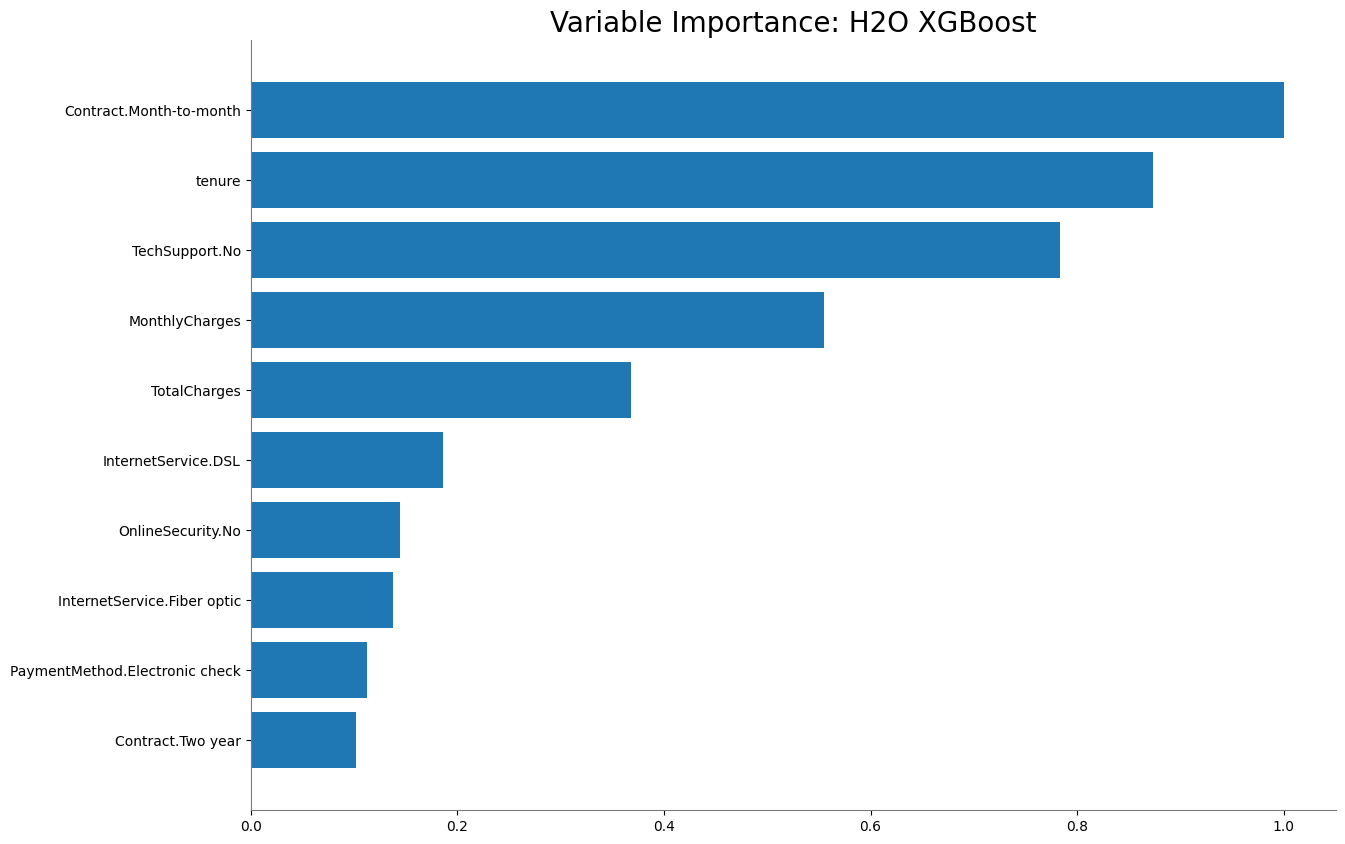

<Figure size 640x480 with 0 Axes>

In [38]:
out.varimp_plot()

In [42]:
aml.leader.download_mojo(path="./")

'/content/GBM_1_AutoML_1_20231220_234019.zip'